In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from pylab import rcParams
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
warnings.filterwarnings("ignore")

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df=sns.load_dataset('penguins')
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [4]:
df.shape

(344, 7)

In [5]:
df.size

2408

In [6]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [10]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['bill_length_mm']

0      39.1
1      39.5
2      40.3
3       NaN
4      36.7
       ... 
339     NaN
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 344, dtype: float64

In [13]:
df['bill_length_mm'].fillna(df['bill_length_mm'].mean(),inplace=True)

In [14]:
df['bill_length_mm'].isna().sum()

np.int64(0)

In [15]:
df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean(),inplace=True)

In [16]:
df['bill_depth_mm'].isna().sum()

np.int64(0)

In [17]:
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(),inplace=True)

In [18]:
df['flipper_length_mm'].isna().sum()

np.int64(0)

In [19]:
df['body_mass_g']

0      3750.0
1      3800.0
2      3250.0
3         NaN
4      3450.0
        ...  
339       NaN
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 344, dtype: float64

In [20]:
df['body_mass_g'].fillna(df['body_mass_g'].mean(),inplace=True)

In [21]:
df['body_mass_g'].isnull().sum()

np.int64(0)

In [22]:
df['body_mass_g'].fillna(df['body_mass_g'].mean(),inplace=True)

In [23]:
df['body_mass_g'].isna().sum()

np.int64(0)

In [24]:
df['sex'].dtype

dtype('O')

In [25]:
df['sex'].isna().sum()

np.int64(11)

In [26]:
df['sex'].fillna(df['sex'].mode()[0],inplace=True)

In [27]:
df['sex'].isna().sum()

np.int64(0)

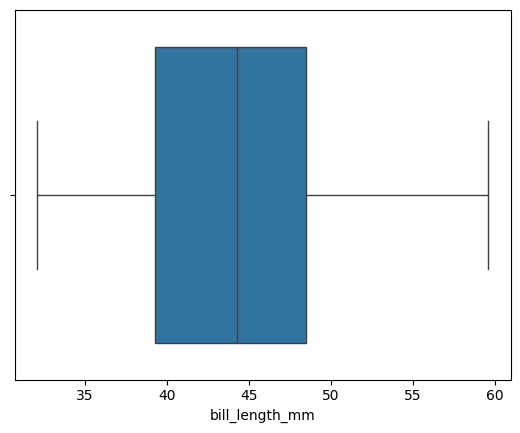

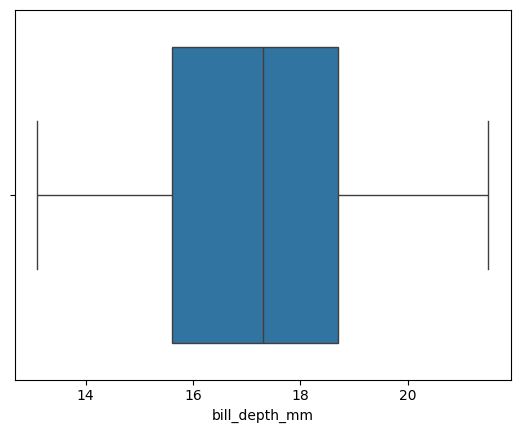

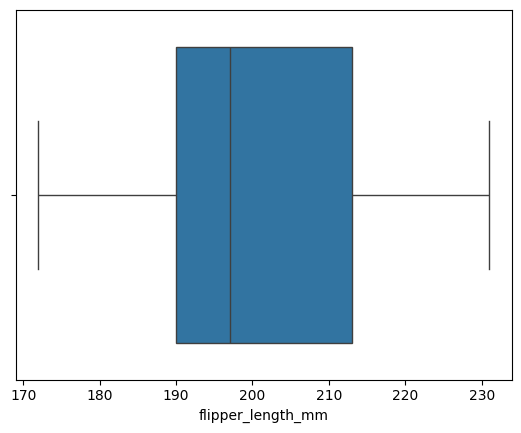

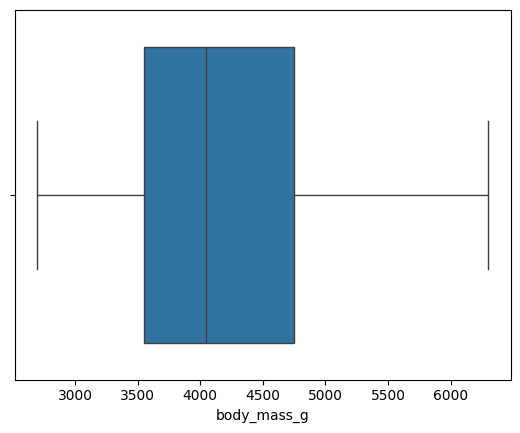

In [28]:
for i in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[i])        
    plt.show()

In [29]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [30]:
df['species'].dtype

dtype('O')

In [31]:
df['island'] = df['island'].astype('category')


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['island'] = le.fit_transform(df['island'])
df['island'].value_counts()

island
0    168
1    124
2     52
Name: count, dtype: int64

In [33]:
encoder = LabelEncoder()
df['species']=df['species'] = encoder.fit_transform(df['species'])
df['species'].value_counts()

species
0    152
2    124
1     68
Name: count, dtype: int64

In [34]:
encoder = LabelEncoder()
df['sex']=df['sex'] = encoder.fit_transform(df['sex'])
df['sex'].value_counts()

sex
1    179
0    165
Name: count, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
x=df.drop('species',axis=1)
y=df['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) # 42 is best for better accuracy
print("Train set:",x_train.shape,y_train.shape)
print("Test set:",x_test.shape,y_train.shape)

Train set: (275, 6) (275,)
Test set: (69, 6) (275,)


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Create and train the regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# Model evaluation
print("MAE:",mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 0.22088739325033688
MSE: 0.07764378893911107
R² Score: 0.895457556804551


In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [38]:
# Train Decision Tree Refressor
dt_model=DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train,y_train)

dt_pred=dt_model.predict(x_test)
print("Descision Tree Regression")
print("MAE:",mean_absolute_error(y_test, y_pred))
print("MSE:",mean_absolute_error(y_test,dt_pred))
print("R2 Score:",r2_score(y_test,dt_pred))

Descision Tree Regression
MAE: 0.22088739325033688
MSE: 0.057971014492753624
R2 Score: 0.8829185520361991


In [39]:
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

rf_preds=rf_model.predict(x_test)
print("Random Forest Performance")
print("MSE:",mean_absolute_error(y_test,rf_preds))
print("R2 Score:",r2_score(y_test,rf_preds))

Random Forest Performance
MSE: 0.05014492753623189
R2 Score: 0.9667566742081448


In [40]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error,r2_score

#Ridge Regression Model 

redge_model=Ridge(alpha=1.0) #Adjust alpha for regulation strenght 
redge_model.fit(x_train,y_train)

redge_preds=redge_model.predict(x_test)
print("\n Rigde Regression Performance")
print("MSE:",mean_absolute_error(y_test,redge_preds))
print("R2 Score:",r2_score(y_test,redge_preds))



 Rigde Regression Performance
MSE: 0.22075340189497494
R2 Score: 0.8954105701406918


In [41]:
#Lasso Regression Model 

lasso_model=Lasso(alpha=0.01) #Lasso may need smaller alpha to avoid too much features elimination 
lasso_model.fit(x_train,y_train)

lasso_preds=lasso_model.predict(x_test)
print("\n  Lasso Regression Performance")
print("MSE:",mean_absolute_error(y_test,lasso_preds))
print("R2 Score:",r2_score(y_test,lasso_preds))



  Lasso Regression Performance
MSE: 0.22266712751865914
R2 Score: 0.8935547966713847


In [42]:
#ElasticNet Model 

elastic_net__model=ElasticNet(alpha=0.01,l1_ratio=0.5) #l1_ratio=0.5 balance Ridge & Lassa
elastic_net__model.fit(x_train,y_train)

elastic_net_preds=elastic_net__model.predict(x_test)
print("\n  elastic net Regression Performance")
print("MSE:",mean_absolute_error(y_test,elastic_net_preds))
print("R2 Score:",r2_score(y_test,elastic_net_preds))


  elastic net Regression Performance
MSE: 0.22113754630576016
R2 Score: 0.8946924058367695


In [43]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
#import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Gradient Boosting Regression 

gbr =GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
gbr.fit(x_train,y_train)
y_pred_gbr=gbr.predict(x_test)
print("Gradient Boosting RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_gbr)))

Gradient Boosting RMSE: 0.1867479264675046


In [44]:
import xgboost as xgb
xgbr=xgb.XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
xgbr.fit(x_train,y_train)
y_pred_xgbr=xgbr.predict(x_test)
print("XGBoost RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_xgbr)))

XGBoost RMSE: 0.2026530615409431


In [45]:
# AdaBoost Regression

abr=AdaBoostRegressor(n_estimators=100,learning_rate=0.1,random_state=42)
abr.fit(x_train,y_train)
y_pred_abr=abr.predict(x_test)
print("AdaBoost RMSE",np.sqrt(mean_squared_error(y_test,y_pred_abr)))

AdaBoost RMSE 0.1429944566165448


In [46]:
summary=pd.DataFrame({
    'Actual species':y_test,
    'LinearRegression':y_pred,
    'Decision Tree Prediction':dt_pred,
    'Random forest prediction':rf_preds,
    'Ridge regression performance':redge_preds,
    'Lasso regression performance':lasso_preds,
    'elastic net Regression Performance':elastic_net_preds,
    'XGBoost Regression':y_pred_xgbr,
    'AdaBoostRegressor':y_pred_abr,
    'GradientBoosting Prediction':y_pred_gbr,
    
    
})
print('\nPrediction Summary\n')
print(summary.head())


Prediction Summary

     Actual species  LinearRegression  Decision Tree Prediction  \
194               1          0.786078                       1.0   
157               1          0.871755                       1.0   
225               2          2.035961                       2.0   
208               1          0.868485                       1.0   
318               2          1.887587                       2.0   

     Random forest prediction  Ridge regression performance  \
194                      1.00                      0.787687   
157                      0.96                      0.869618   
225                      2.00                      2.035172   
208                      0.99                      0.868125   
318                      1.33                      1.885792   

     Lasso regression performance  elastic net Regression Performance  \
194                      0.808961                            0.799133   
157                      0.837370                  

✅ Random Forest, Decision Tree, and AdaBoost are the best models for this task, as they achieved the highest accuracy and lowest RMSE.
⚠️ Linear, Ridge, Lasso, and Elastic Net Regression are not suitable for classification.
📉 XGBoost and Gradient Boosting performed well but slightly worse than RF/DT/AdaBoost.

✅ Random Forest or AdaBoost is the best choice since both provided perfect classification accuracy.

In [ ]:
# support vector regression (SVR) Standard dard
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.fit_transform(x_test)

svr=SVR(kernel='rbf',C=100,epsilon=0.1)
svr.fit(x_train_scaler,y_train)
y_pred_svr=svr.predict(x_test_scaler)
print("SVR RMSE",np.sqrt(mean_squared_error(y_test,y_pred_svr)))

SVR RMSE 0.17310208674702054


In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
import pandas as pd
from sklearn.datasets import load_diabetes

# Load sample dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
model = DecisionTreeRegressor()

# Define hyperparameter distribution
param_dist = {
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),  # Fixed typo
    'min_samples_leaf': randint(1, 5)    # Fixed typo
}

# Randomized search
random_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5, scoring='r2', n_jobs=1, random_state=42)
random_search.fit(x_train, y_train)

# Print results
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 3}
Best Score: 0.28592428075048615


In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
import pandas as pd
from sklearn.datasets import load_diabetes

# Load sample dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
model = RandomForestRegressor()

# Define hyperparameter distribution
param_dist = {
    'n_estimators': randint(50, 300),       # Number of trees
    'max_depth': randint(3, 20),            # Tree depth
    'min_samples_split': randint(2, 10),    # Minimum samples required to split
    'min_samples_leaf': randint(1, 5),      # Minimum samples required at leaf
    'max_features': ['sqrt', 'log2', None]
}

# Randomized search
random_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5, scoring='r2', n_jobs=1, random_state=42)
random_search.fit(x_train, y_train)

# Print results
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Parameters: {'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 201}
Best Score: 0.4370239412447921
